[-0.61969979 -0.46688241  0.04723278  1.04894841  0.55298671  2.04234646
  2.35407097  4.25459508  1.88878691  8.03402534  4.19556999  6.01239715
  6.16266111  7.51411649  6.66751523  7.71652838  9.62382289  9.41554584
 10.39421409 13.24822761] [ 1.05186556 -1.2224967   2.36384519  1.06833487  1.84957031  1.72934349
  3.14698977  2.48367809  2.14380994  2.35819371  1.22642629  1.69135425
  4.25187226  1.98637942  4.29744923  1.28751417  2.25644959  2.75090499
  4.87590708  4.32608737]
(20,) (20,)
20


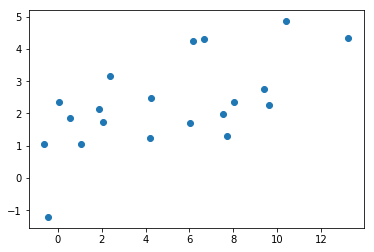

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#参数
learning_rate = 0.01 #训练速度
trainning_epochs = 1000 #训练次数
display_step = 50 #显示速度
train_x = np.linspace(0, 10, num=20) + np.random.randn(20) #数组，1维20个
train_y = np.linspace(1, 4, num=20) + np.random.randn(20)
print(train_x, train_y) #数据
print(train_x.shape, train_y.shape) #形状
n_samples = train_x.shape[0] #样本的数量
print(n_samples)
plt.scatter(train_x, train_y) #绘制散点图
plt.show()

     -0.18899772 -0.0923434
     -0.18899772 -0.0923434
45.92347890178804
  epoch 0 cost 4.1674514 W 0.1285965 B -0.04044673
  epoch 100 cost 1.3142266 W 0.28544 B 0.6392669
  epoch 200 cost 1.214136 W 0.25133723 B 0.9415365
  epoch 300 cost 1.1918107 W 0.23545325 B 1.0823247
  epoch 400 cost 1.1866828 W 0.22805513 B 1.147898
  epoch 500 cost 1.1854378 W 0.22460914 B 1.1784415
  epoch 600 cost 1.1851057 W 0.22300394 B 1.1926694
  epoch 700 cost 1.1850051 W 0.2222566 B 1.1992934
  epoch 800 cost 1.1849698 W 0.22190858 B 1.2023779
  epoch 900 cost 1.184956 W 0.22174676 B 1.2038121
执行ok
平均偏差
  平均偏差 1.1849499 W 0.22167134 B 1.2044808


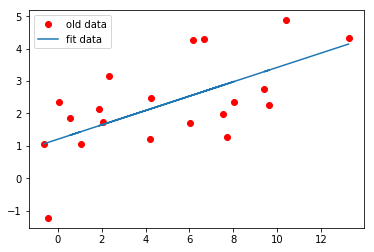

SystemExit: 

e:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
import tensorflow as tf
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(np.random.randn(), name="weight")
B = tf.Variable(np.random.randn(), name="bias")
a = tf.constant(10) #常量
init = tf.global_variables_initializer() #初始化
def main(_):
    with tf.Session() as sess:
        sess.run(init) #初始化
        print("    ",sess.run(W), sess.run(B)) #默认初始的值
        y_pred = tf.add(tf.multiply(X, W), B) #先乘再加
        sess.run(y_pred, feed_dict={X:0}) #赋值并计算
        print("    ",sess.run(W), sess.run(B))
        print(sess.run(tf.reduce_sum(train_y))) #求和的方式，降维
        cost = tf.reduce_sum(tf.pow(y_pred-Y, 2))/n_samples #差的平方除以平均值，就是均方误差
        optimzer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #梯度下降损失优化
        tf.train.GradientDescentOptimizer(learning_rate) #设置训练参数
        for epoch in range(trainning_epochs): #定义训练次数
            for (x_t, y_t) in zip(train_x, train_y): #zip表示把一个一位数组变为二维数组，循环-train_x,train_y
                sess.run(optimzer,feed_dict={X:x_t, Y:y_t})
            if epoch%100 == 0: #没循环100次，显示
                cost_t = sess.run(cost, feed_dict={X:train_x, Y:train_y}) #运行
                print("  epoch",epoch, "cost",cost_t, "W",sess.run(W), 'B',sess.run(B)) #训练的越多，cost越小
        print("执行ok")
        training_cost = sess.run(cost,feed_dict={X:train_x, Y:train_y})
        print("平均偏差")
        print("  平均偏差",training_cost, "W",sess.run(W), 'B',sess.run(B))
        plt.plot(train_x, train_y, "ro", label="old data")
        plt.plot(train_x, sess.run(W)*train_x+sess.run(B), label="fit data")
        plt.legend()
        plt.show()
if __name__ == "__main__":
    tf.app.run() #执行过程